Instalando pacotes necessários

~> NumPy: Biblioteca utilizada para a manipulação de matrizes;
~> Pandas: Biblioteca utilizada na manipulação e análise de dados;
~> Scikit-learn: Biblioteca específica para aplicação de técnicas de Machine Learning;
~> Seaborn: Biblioteca produzida com base no MatPlotLib, com uma interface mais amigável para produção de gráficos.

In [1]:
pip install numpy pandas scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


Importando as bibliotecas a serem utilizadas

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Carregando os dados

In [3]:
# Carregar o dataset
url_red = 'C:/Users/Usuario/Documents/ML_vendas/wine_quality/winequality_red.csv'
url_white = 'C:/Users/Usuario/Documents/ML_vendas/wine_quality/winequality_white.csv'

df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

# Adicionar uma coluna para identificar o tipo de vinho
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combinar os datasets
df = pd.concat([df_red, df_white], ignore_index=True)

# Aplicar One-Hot Encoding na coluna 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)


Análise exploratória dos dados

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type_white  
0      9.4        5       False  
1      9.8        

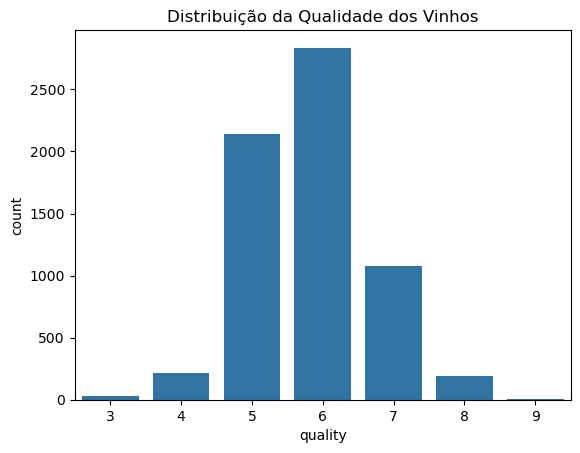

In [4]:
print(df.head())
print(df.info())
print(df.describe())

sns.countplot(x='quality', data=df)
plt.title('Distribuição da Qualidade dos Vinhos')
plt.show()

In [ ]:
Histogramas

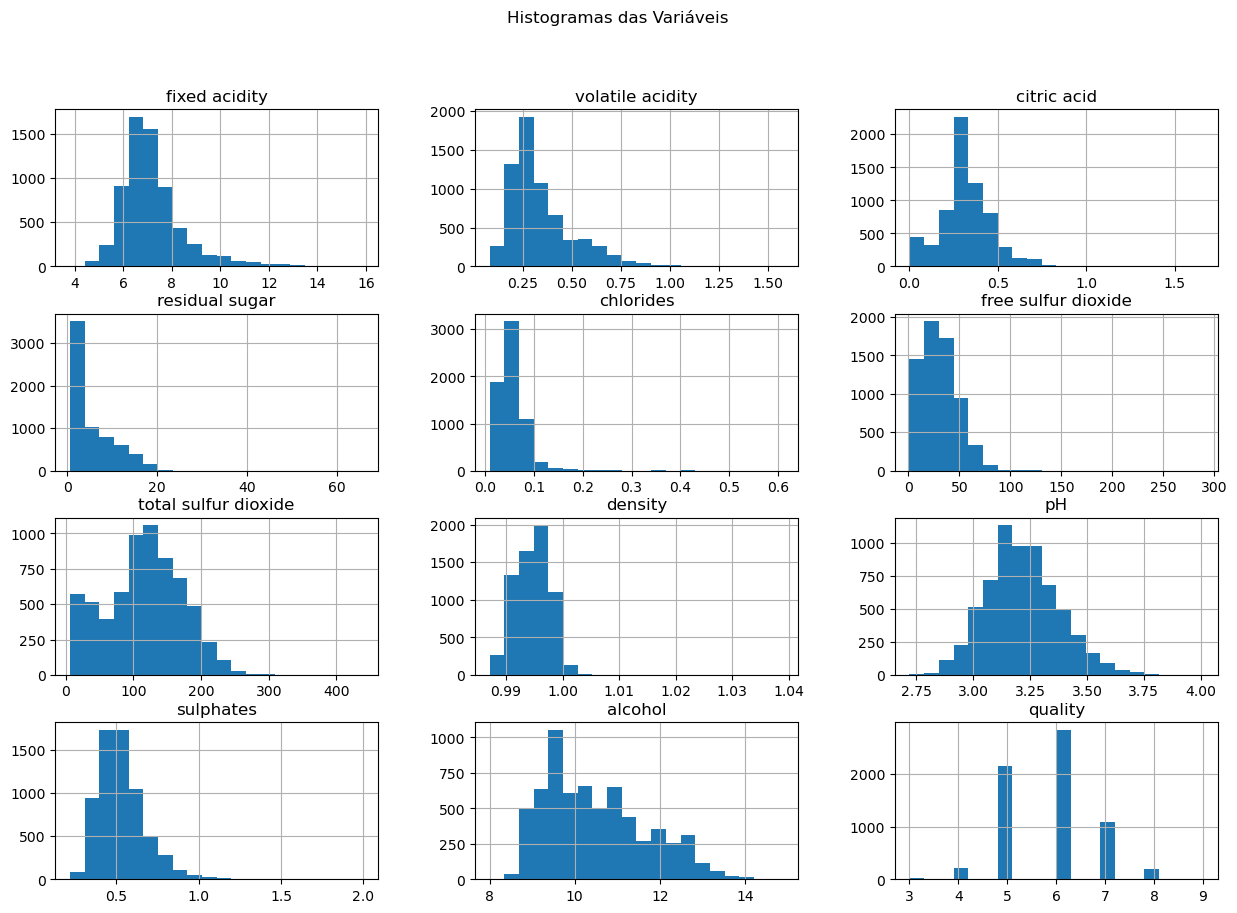

In [5]:
# 1. Histogramas
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas das Variáveis')
plt.show()

Boxplots

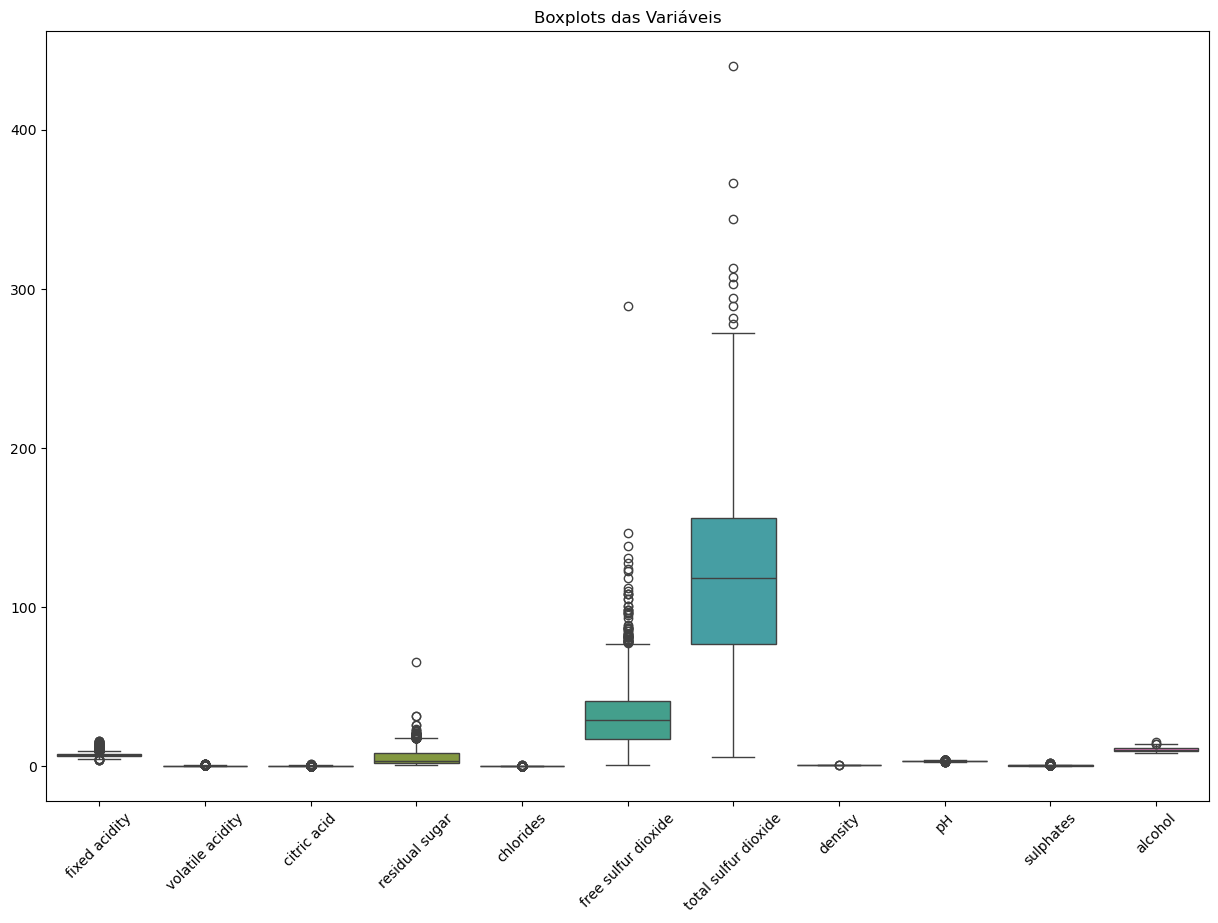

In [6]:
# 2. Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(columns=['quality', 'type_white']))
plt.title('Boxplots das Variáveis')
plt.xticks(rotation=45)
plt.show()

Scarterplot

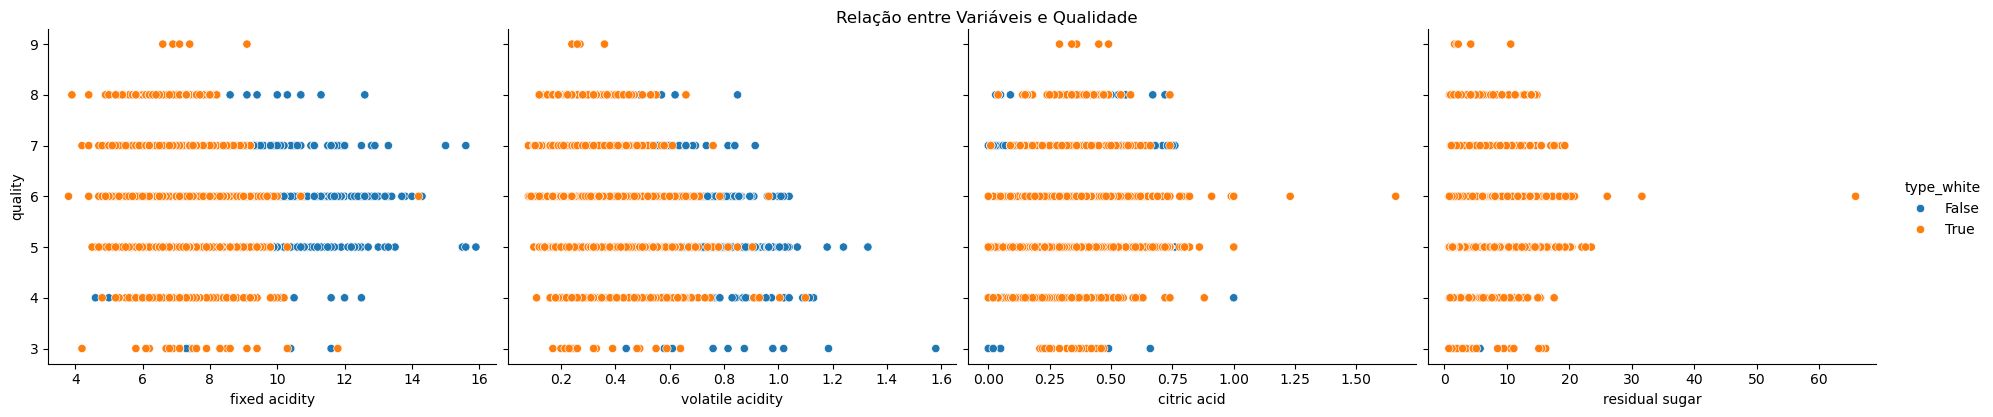

In [8]:
# 3. Scatter Plots
sns.pairplot(df, x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar'], 
             y_vars=['quality'], hue='type_white', height=4, aspect=1.2)
plt.suptitle('Relação entre Variáveis e Qualidade', y=1.02)
plt.show()

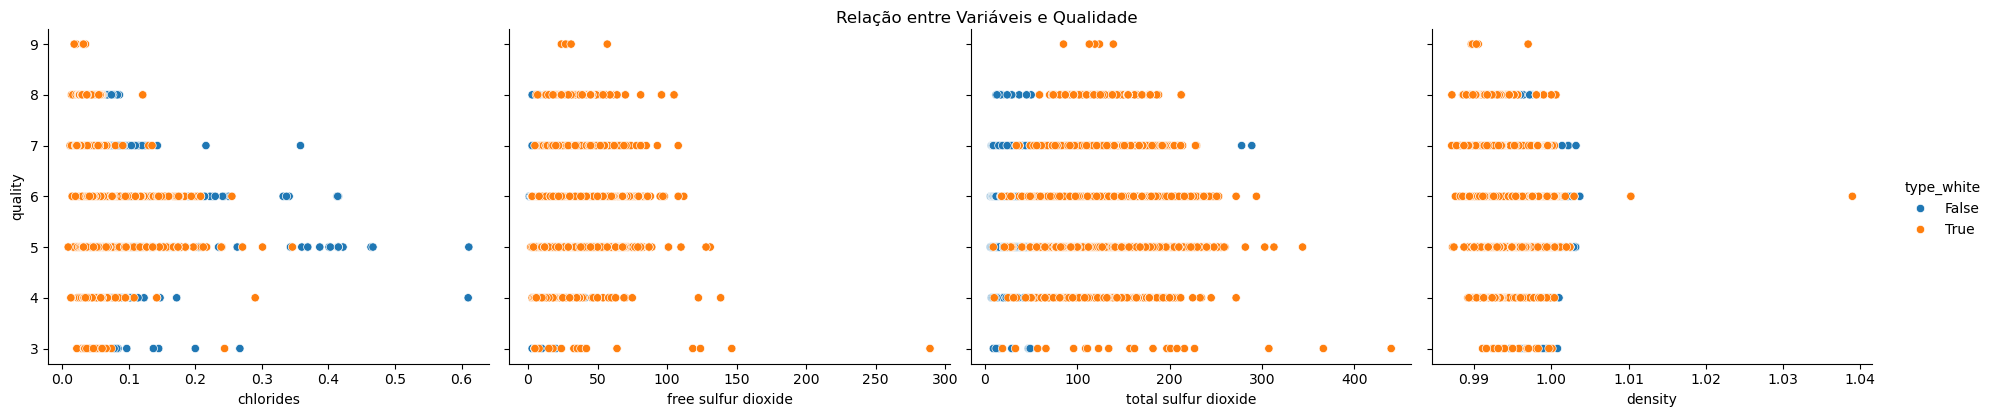

In [10]:
# 3. Scatter Plots
sns.pairplot(df, x_vars=['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'], 
             y_vars=['quality'], hue='type_white', height=4, aspect=1.2)
plt.suptitle('Relação entre Variáveis e Qualidade', y=1.02)
plt.show()

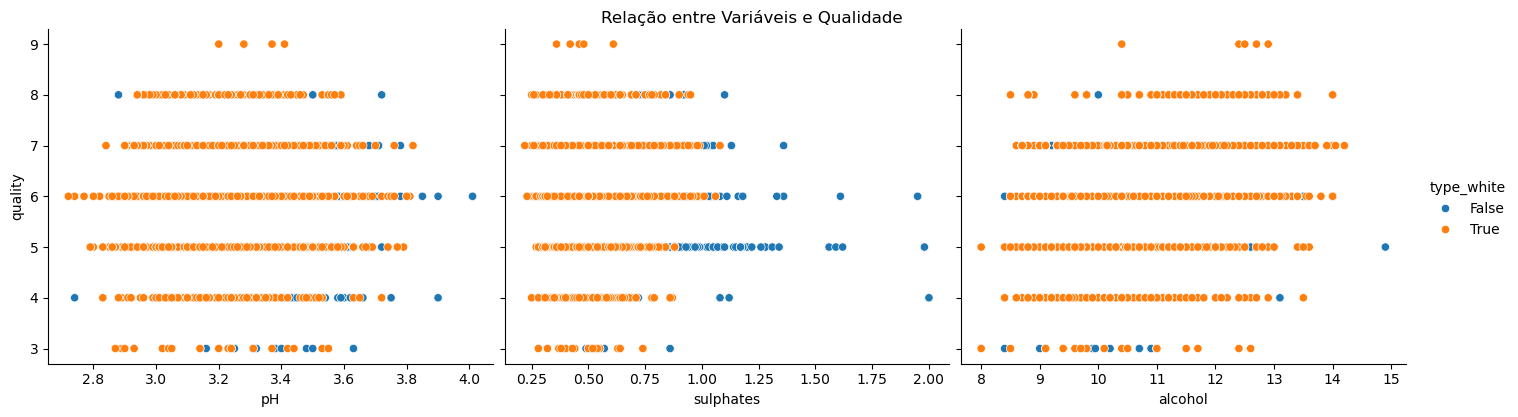

In [12]:
# 3. Scatter Plots
sns.pairplot(df, x_vars=['pH', 'sulphates', 'alcohol'], 
             y_vars=['quality'], hue='type_white', height=4, aspect=1.2)
plt.suptitle('Relação entre Variáveis e Qualidade', y=1.02)
plt.show()

Heatmap

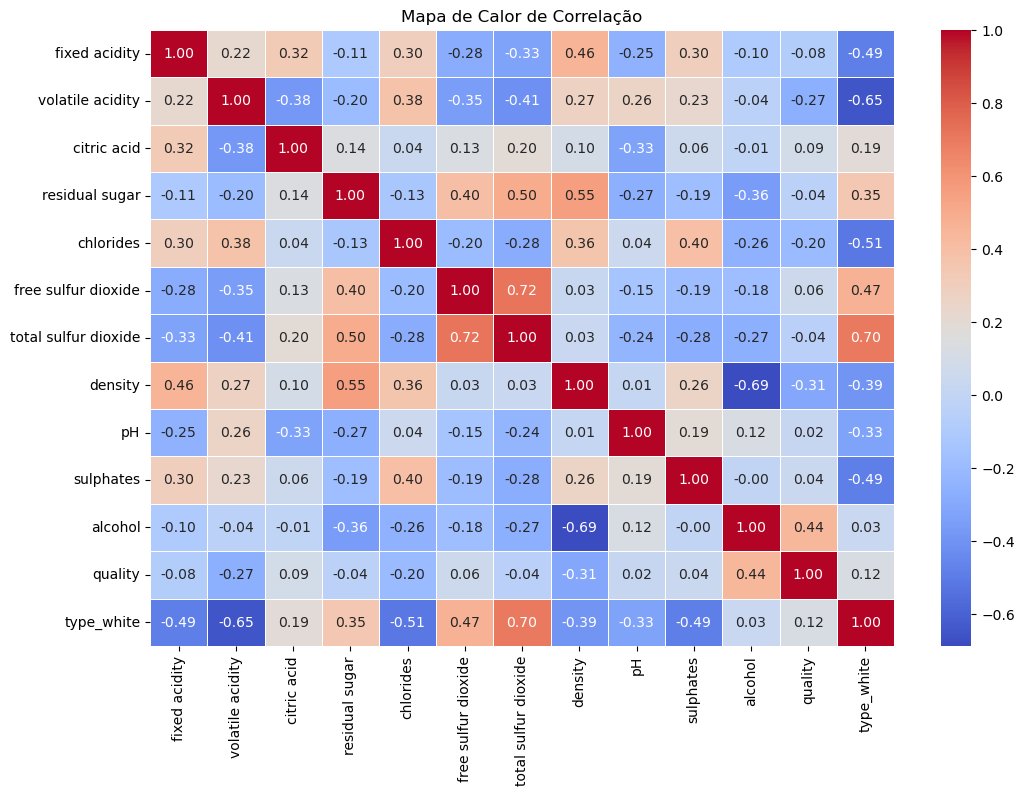

In [13]:
# 4. Heatmap de Correlação
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlação')
plt.show()

Qualidade por tipo de vinho

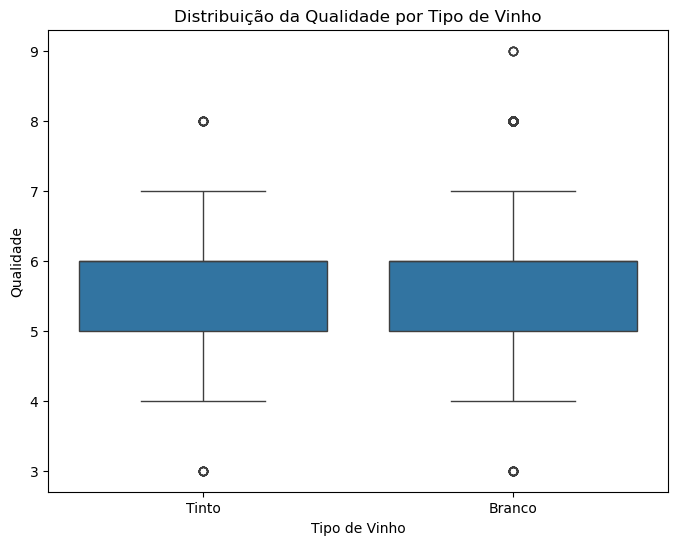

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type_white', y='quality', data=df)
plt.xticks([0, 1], ['Tinto', 'Branco'])
plt.title('Distribuição da Qualidade por Tipo de Vinho')
plt.xlabel('Tipo de Vinho')
plt.ylabel('Qualidade')
plt.show()

In [ ]:
Gráficos de densidade (KDE)

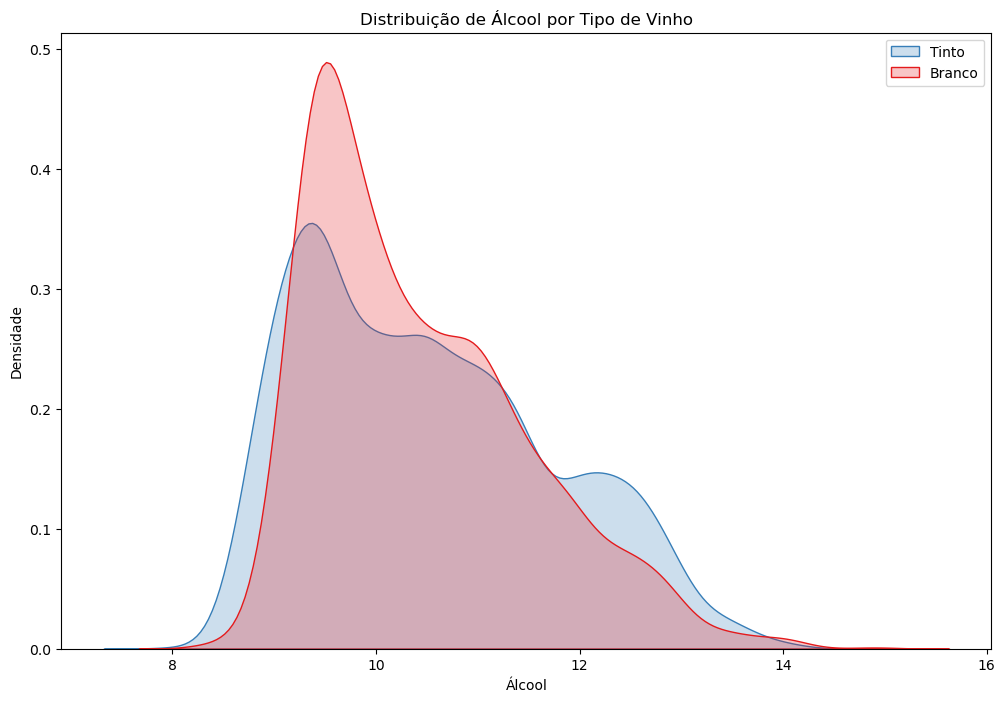

In [15]:
# 6. Gráficos de Densidade (KDE)
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='alcohol', hue='type_white', fill=True, common_norm=False, palette='Set1')
plt.title('Distribuição de Álcool por Tipo de Vinho')
plt.xlabel('Álcool')
plt.ylabel('Densidade')
plt.legend(['Tinto', 'Branco'])
plt.show()

Pré processamento dos dados

In [16]:
X = df.drop('quality', axis=1)
y = df['quality']

y = y.apply(lambda x: 1 if x >= 7 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Treinamento do modelo

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Avaliação do modelo

In [18]:
y_pred = model.predict(X_test)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nAcurácia do Modelo:")
print(accuracy_score(y_test, y_pred))

Matriz de Confusão:
[[1008   40]
 [ 183   69]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1048
           1       0.63      0.27      0.38       252

    accuracy                           0.83      1300
   macro avg       0.74      0.62      0.64      1300
weighted avg       0.80      0.83      0.80      1300


Acurácia do Modelo:
0.8284615384615385
